In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv")


In [14]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [15]:

df['rank'].replace({'Prof':3,'AsstProf':2,'AssocProf':1},inplace= True)

In [16]:
df.sample(4)

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
128,3,A,32,30,Male,113278
130,1,A,11,9,Male,83001
336,3,B,35,23,Male,98053
390,3,A,40,19,Male,166605


In [17]:
df['discipline'].value_counts()

B    216
A    181
Name: discipline, dtype: int64

3    266
2     67
1     64
Name: rank, dtype: int64


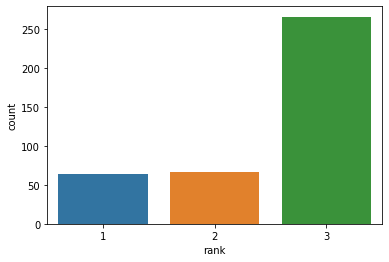

In [18]:
print(df['rank'].value_counts())
sns.countplot(x='rank', data= df)
plt.show()             

In [19]:
df.shape

(397, 6)

In [20]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [21]:
# dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    int64 
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 18.7+ KB


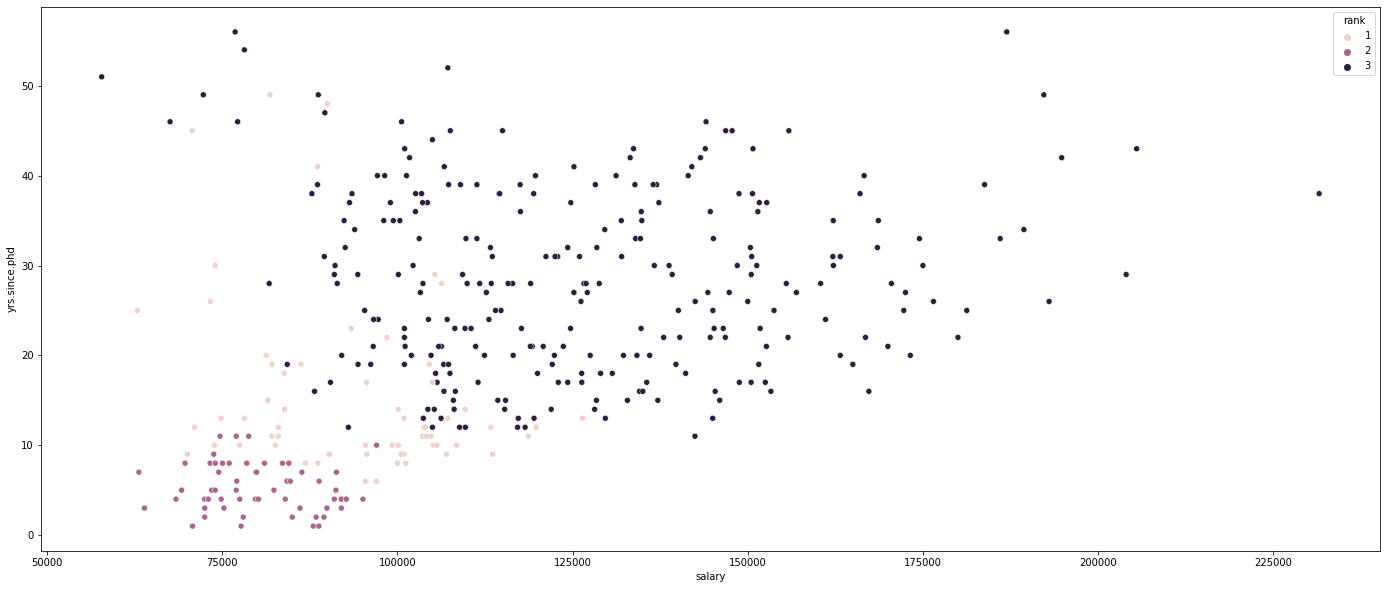

In [22]:
# we plot scatterplot to see relationship between feature and target

plt.figure(figsize=(24,10))
sns.scatterplot(y='yrs.since.phd', x='salary', hue='rank',data=df, )
plt.show()

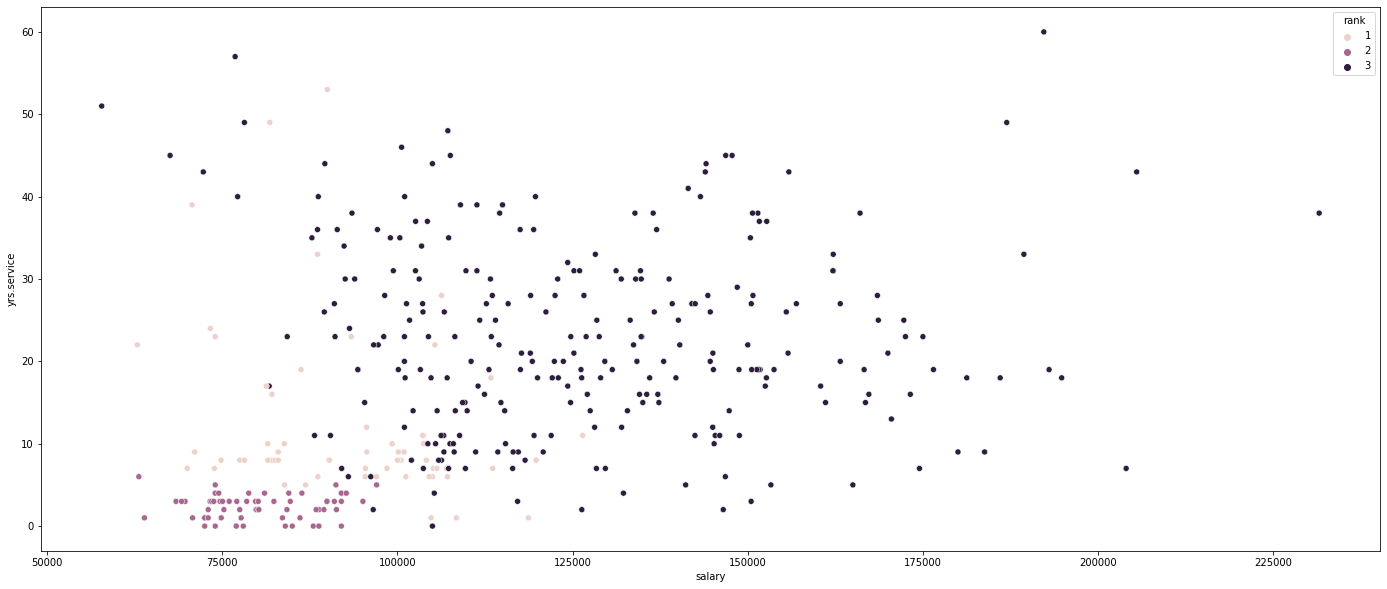

In [23]:

plt.figure(figsize=(24,10))
sns.scatterplot(y='yrs.service', x='salary', hue='rank',data=df, )
plt.show()

In [24]:

df.describe()

,rank,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,2.508816,22.314861,17.614610,113706.458438
std,0.757486,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,2.000000,12.000000,7.000000,91000.000000
50%,3.000000,21.000000,16.000000,107300.000000
75%,3.000000,32.000000,27.000000,134185.000000
max,3.000000,56.000000,60.000000,231545.000000


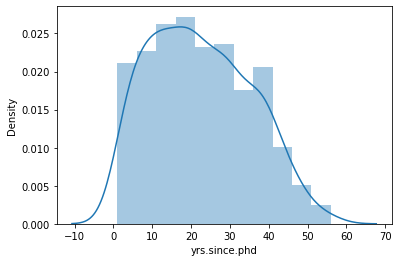

In [25]:
sns.distplot(df['yrs.since.phd'])
plt.show()

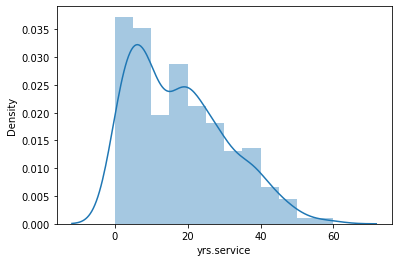

In [26]:
sns.distplot(df['yrs.service'])
plt.show()

In [ ]:
#  'yrs.service' feature is log normal distributed
# 'yrs.since.phd' feature is  normal distributed

In [27]:
x= df[['yrs.service','yrs.since.phd','rank']]
y= df.salary

In [28]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [30]:
sc= StandardScaler()

scaler= sc.fit_transform(df[['yrs.service', 'yrs.since.phd']])

In [31]:
scaler= pd.DataFrame(scaler)

X=pd.concat([scaler,df['rank']], axis=1)

In [32]:
# split the dataset into train and test

xtrain,xtest, ytrain,ytest= train_test_split(x,y,test_size=0.25, random_state=769 )
                                        

In [33]:
# MODEL FIT WITH LINEAR REGRESSION
from sklearn.linear_model import LinearRegression


In [36]:
lr= LinearRegression()

lr.fit(xtrain,ytrain)

y_pred= lr.predict(xtest)

In [38]:
print(r2_score(ytest,y_pred))

print('mse = ', mse(ytest, y_pred))

0.38343309925597713
mse =  536076231.09709543


In [39]:
y_test= ytest

In [41]:
# MODEL FIT WITH RANDOM_FOREST

from sklearn.ensemble import RandomForestRegressor

In [42]:
rf_r= RandomForestRegressor(max_depth= 1)

rf_r.fit(xtrain, ytrain)

rf_pred = rf_r.predict(xtest)


In [44]:
print('r2_score=',r2_score(ytest, rf_pred),'\n')

print('rf_r_mse', mse(ytest, rf_pred))

r2_score= 0.4831724085129735 

rf_r_mse 449357542.60733443


In [47]:
#  split dataset into train and test

x_train,x_test, y_train,y_test= train_test_split(X,y,test_size=0.25, random_state=769 )

In [46]:
# MODEL FIT WITH ADABOOST_REGRESSOR

from sklearn.ensemble import AdaBoostRegressor

In [48]:
adb_r = AdaBoostRegressor(n_estimators= 80, learning_rate=1.12 , random_state= 719)

adb_r.fit(x_train,y_train)

adb_pred= adb_r.predict(x_test)

In [51]:
print('r2_score=', r2_score(y_test, adb_pred))


r2_score= 0.4323221924590406


In [52]:
# MODEL FIT WITH GRADIENT_BOOSTING

from sklearn.ensemble import GradientBoostingRegressor

In [53]:
gbr= GradientBoostingRegressor(max_depth=1,learning_rate= 0.037)
gbr.fit(x_train,y_train)

gbr_pred= gbr.predict(x_test)

In [54]:
print('r2_score', r2_score(y_test,gbr_pred))



r2_score 0.42844018768494807


In [56]:
pd.DataFrame({ 'actual_salary':y_test, 'lr_pred': y_pred, 'adb_pred':adb_pred ,'rf_pred':rf_pred})

,actual_salary,lr_pred,adb_pred,rf_pred
256,140300,117500.568223,130012.828829,125903.519588
315,84716,98237.087772,78414.666667,86998.992938
218,109650,86584.872793,101499.428571,86998.992938
184,101000,117787.148781,130012.828829,125903.519588
203,152500,116067.665433,126455.948387,125903.519588
...,...,...,...,...
30,132261,128660.720398,126455.948387,125903.519588
243,108200,117787.148781,130012.828829,125903.519588
127,72500,96357.433459,77762.862069,86998.992938
376,74856,97663.926656,77762.862069,86998.992938
